In [1]:
import pandas as pd
import numpy as np

In [364]:
from matplotlib import pyplot as plt
%matplotlib inline

# General Questions to self.
- Should we writing/saving the clean versions to new csvs and etc? Confer with Kevin post cleaning?
- Could we potentially create a column with the genres, so as to be able to get gross/genre?

# 1. Loading and cleaning Bom gross

In [2]:
Bom = pd.read_csv("Data/bom.movie_gross.csv")

In [3]:
Bom.head()
Bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Comments on missing values for BOM Movie Gross

- 5 missing values in studio (will most likely remove, since they're only 5 out of 3387)
    - one of the movies in the missing studio did do $100m+ in gross, so could be a big gross to pull out from the foreign category
- 28 missing values in domestic gross (turn to 0)
- 1350 missing values in foreign gross (turn to 0)

In [4]:
# Foreign gross is a str, will have to convert that to a float. First, I need to replace all
# null's with 0. This will be to denote that they didn't have any foreign gross.
# Could do a geographical based analysis??
Bom.loc[Bom['foreign_gross'].isna()]
Bom['foreign_gross'] = Bom['foreign_gross'].str.replace(',','')
Bom['foreign_gross'] = Bom['foreign_gross'].astype(float)
Bom['foreign_gross'] = Bom['foreign_gross'].fillna(0)
#One of them has a comma, will have to strip that first.
Bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [5]:
#Domestic gross has some missing values as well, will first inspect. Upon confirming that
#they're just foreign films, then I'll replace thos nulls with 0.
Bom.loc[Bom['domestic_gross'].isna()]
Bom['domestic_gross'] = Bom['domestic_gross'].fillna(0)
Bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [6]:
# Will create a new column, total_gross, to be able to compare the aggregate gross.
Bom['total_gross'] = Bom['domestic_gross'] + Bom['foreign_gross']

In [7]:
# Going to inspect the movies that have null studio values, since it's only 5 going to see
# if I can replace them from just looking them up. Decided on just dropping the 5 movies,
# due to it being sucha small percentage of the overall data set.
Bom.loc[Bom['studio'].isna()]
Clean_Bom = Bom.dropna(subset = ['studio'])
Clean_Bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64

In [325]:
Clean_Bom.rename(columns={'domestic_gross':'domestic_gross_bom'},inplace=True)

/Users/vladiseki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [292]:
Clean_Bom.to_csv("data/cleaned/bom.movie_gross_clean.csv")

In [314]:
Clean_Bom_titles = list(Clean_Bom['title'])

In [320]:
def compare_title(title):
    if title in Clean_Bom_titles:
        return True
    else:
        return False

In [323]:
budgets['Bom'] = budgets['movie'].map(compare_title)
budgets['Bom'].value_counts()

False    4536
True     1246
Name: Bom, dtype: int64

In [338]:
Clean_Bom['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
MSF             1
CineGalaxy      1
Jampa           1
HC              1
PalT            1
Name: studio, Length: 257, dtype: int64

# 1.5 Joining in the budgets to BOM, to give a value prop

In [337]:
#budgets.info()

In [328]:
Bom_and_budget_left_join_on_title = budgets.join(Clean_Bom.set_index(['title']), on=['movie'])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Bom,studio,domestic_gross_bom,foreign_gross,year,total_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,False,NaN,NaN,NaN,NaN,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,True,BV,241100000.0,804600000.0,2011.0,1.045700e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,False,NaN,NaN,NaN,NaN,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,True,BV,459000000.0,946400000.0,2015.0,1.405400e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,NaN,NaN,NaN,NaN,NaN


In [330]:
Bom_and_budget_left_join_on_title.loc[(Bom_and_budget_left_join_on_title['Bom']== True) & (Bom_and_budget_left_join_on_title['studio'] != Bom_and_budget_left_join_on_title['studio'].isna())]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Bom,studio,domestic_gross_bom,foreign_gross,year,total_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,True,BV,241100000.0,804600000.0,2011.0,1.045700e+09
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,True,BV,459000000.0,946400000.0,2015.0,1.405400e+09
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,True,BV,678800000.0,1369.5,2018.0,6.788014e+08
8,9,2017-11-17,Justice League,300000000,229024295,655945209,True,WB,229000000.0,428900000.0,2017.0,6.579000e+08
9,10,2015-11-06,Spectre,300000000,200074175,879620923,True,Sony,200100000.0,680600000.0,2015.0,8.807000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
5667,68,2012-04-27,Sound of My Voice,135000,408015,429448,True,FoxS,408000.0,0.0,2012.0,4.080000e+05
5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,True,IFC,1600000.0,0.0,2012.0,1.600000e+06
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,True,WB (NL),22800000.0,20200000.0,2015.0,4.300000e+07
5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,True,A24,1600000.0,0.0,2017.0,1.600000e+06


In [339]:
studio_gross = Bom_and_budget_left_join_on_title.groupby('studio')['worldwide_gross'].sum().astype('int64')

In [358]:
# Made studio gross a dataframe with each studio's total gross income
# these are only the movies that overlapped between BOM and budgets
#studio_gross = pd.DataFrame(studio_gross)
studio_gross['#_of_films'] = Bom_and_budget_left_join_on_title.groupby('studio')['Bom'].sum().astype('int64')

In [363]:
studio_gross.describe()

,worldwide_gross,total_production_budget,$_lifetime_return,%_lifetim_return,#_of_films
count,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,99.000000
mean,1.916135e+09,5.918551e+08,1.324280e+09,1.003176,12.585859
std,5.905648e+09,1.724612e+09,4.205917e+09,2.154181,23.758998
min,7.943000e+03,4.000000e+05,-9.009679e+07,-0.994725,1.000000
25%,5.686178e+06,8.650000e+06,-5.256492e+06,-0.499748,1.000000
50%,3.899229e+07,3.700000e+07,7.955193e+06,0.430914,2.000000
75%,3.925437e+08,1.716600e+08,2.452042e+08,2.094872,10.000000
max,3.328602e+10,9.450800e+09,2.383522e+10,13.319383,117.000000


In [362]:
studio_gross['$_lifetime_return'] = studio_gross['worldwide_gross'] - studio_gross['total_production_budget']
studio_gross['%_lifetime_return'] = (studio_gross['worldwide_gross']/studio_gross['total_production_budget']) - 1
studio_gross.loc[studio_gross['#_of_films'] > 10].sort_values('#_of_films',ascending=False)
#studio_gross.reset_index(inplace=True)
#studio_gross

,worldwide_gross,total_production_budget,$_lifetime_return,%_lifetim_return,#_of_films
studio,,,,,
Uni.,27329288200,6597700000,20731588200,3.142245,117
Fox,26795813328,7755500000,19040313328,2.455072,110
WB,22193811969,8197700000,13996111969,1.707322,102
Sony,17601810459,5050500000,12551310459,2.485162,74
Par.,14438207167,4770000000,9668207167,2.026878,74
BV,33286017937,9450800000,23835217937,2.522032,72
LGF,6983389000,2069387650,4914001350,2.374616,61
FoxS,2184538620,501330000,1683208620,3.357486,47
Wein.,2819991732,838000000,1981991732,2.365145,41


In [388]:
studio_usd_sort = studio_gross.sort_values('$_lifetime_return',ascending=False)
studio_pct_sort = studio_gross.loc[studio_gross['#_of_films'] > 10].sort_values('%_lifetime_return',ascending=False)


''

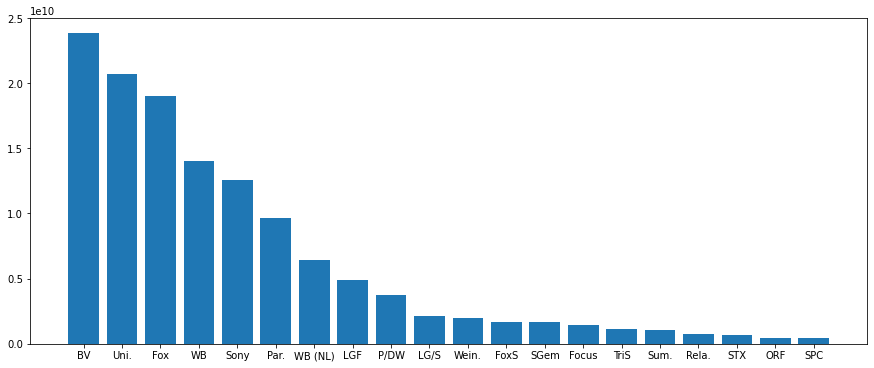

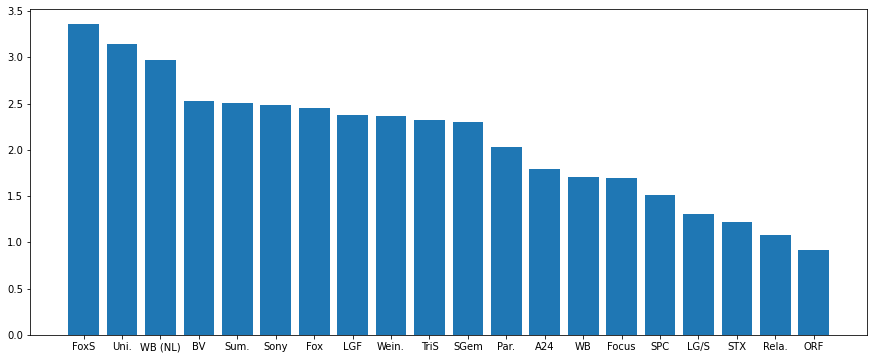

In [389]:
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x=studio_usd_sort['studio'].head(20),height=studio_usd_sort['$_lifetime_return'].head(20))

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x=studio_pct_sort['studio'].head(20),height=studio_pct_sort['%_lifetime_return'].head(20));
;

# 2. Loading in and cleaning RT movie info


In [71]:
Rt = pd.read_csv('Data/rt.movie_info.tsv',sep = '\t')

In [73]:
#Rt.head()
#Rt.isna().sum()
Rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Missing data comments
- synopsis, only missing 62 entries
- rating missing 3 entries. After review of the rows, they will not add anything to the analysis, so we'll remove them.
- genre missing 8 values, can google or can remove since it's only eight entries. Should not be significant to delete them. After reviewing the null entries, determined they would not add anything to the analysis.
- director, missing 199 entries, as we go through the data will see how important that is
- writer, missing 449 entries
- theater_date, missing 359 entries, does not seem very important. But maybe seasonality or holidays do play a role
- dvd_date, missing 359 entries as well. Would not qualify it as important as premiere date.
- currency, missing 1210 entries. Can assume all in dollars, but need to look at values.
- box-office, missing 1210 entries as well. This will make it very difficult to run analytics by genre type. Need to dig into the nulls
- runtime, missing 20 entries
-  studio, missing 1066 entries
- I don't have any move titles....

# Now to clean the new dataframe
- Should condense genre, to a category | subcategory
- Should turn the dates to date value
- Should turn the box office number into an int or float
- Should standardize runtime into mins
- Will remove entries without synopsis as we won't be able to source movie title, and double checked that they do not have box office numbers either.

In [74]:
# Cleaning up the box office numbers from str to int
Rt['box_office'] = Rt['box_office'].str.replace(',','')

In [75]:
# Cleaning up the theater and dvd dates to datetime format, could potentially add a column
# extracting the month val. Can see if there are any specific months that are better for movies.
Rt['theater_date'] = pd.to_datetime(Rt['theater_date'])
Rt['dvd_date'] = pd.to_datetime(Rt['dvd_date'])

# Findings on testing certain methods
Was going to remove the entries without synopsis, and try to match the movie titles in the
budgets CSV, but for it was returning every time a single word or number movie title would
come up in the synopsis string.

Rt = Rt.dropna(subset=['synopsis'])

In [97]:
Rt.isna().sum()

id                 0
synopsis          57
rating             0
genre              0
director         192
writer           442
theater_date     351
dvd_date         351
currency        1212
box_office      1212
runtime           26
studio          1058
dtype: int64

In [145]:
# To condense genres, could just have first genre title as the genre type. Think on it.
# Going to limit genre to main | sub format. Shows that there are
# Testing the concept -> Rt['genre'][41].split(sep='|')
# Testing with a multi-divide
# Rt.loc[Rt['genre']=='Art House and International|Drama|Horror|Mystery and Suspense|Science Fiction and Fantasy']
# Removing Classics as a genre, because that's too post-mortem for a film.
# Everyone would love to make a classic.
# New genre lowers the genre type from 299 to 78.

def genre_condenser(genre):
    new_genre = genre.split(sep='|')
    try:
        if 'Classics' in new_genre:
            new_genre.remove('Classics')
            new_genre = f'{new_genre[0]}|{new_genre[1]}'
            return new_genre
        else:
            new_genre = f'{new_genre[0]}|{new_genre[1]}'
            return new_genre
    except:
        new_genre = f'{new_genre[0]}'
        return new_genre

#Dropping the Nan values associated with genre.
#Rt = Rt.dropna(subset = ['genre'])
#Testing out the function
#genre_condenser(Rt['genre'][189])
Rt['new_genre'].value_counts()
#Rt['new_genre'] = Rt['genre'].map(genre_condenser)
#Rt.head()

Drama                                  172
Comedy|Drama                           157
Action and Adventure|Drama             130
Comedy                                 120
Art House and International|Drama      105
                                      ... 
Animation|Anime and Manga                1
Musical and Performing Arts|Western      1
Musical and Performing Arts|Romance      1
Special Interest                         1
Mystery and Suspense|Romance             1
Name: new_genre, Length: 78, dtype: int64

In [293]:
Rt.to_csv("data/cleaned/rt.movie_info_clean.tsv")

# 2.5 Loading in the RT Reviews
- When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

- When less than 60% of reviews for a movie or TV show are positive, a green splat is displayed to indicate its Rotten status.

https://www.rottentomatoes.com/about

- To change it to a numeric value or not? 
- Or 
- one or zero?

In [109]:
Rt_Reviews = pd.read_csv('Data/rt.reviews.tsv',delimiter='\t',encoding='cp850')
Rt_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [112]:
Rt_Reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

# Missing values
-review         5563

-rating        13517

-critic         2722

-publisher       309

In [113]:
Rt_Reviews['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [149]:
#Rt_Reviews['id'].value_counts()
#It appears that there are only 1135 unique movies according to the unique id count.
#So we have lost another 400

In [306]:
# In order to join, need to change the rating label col name for one of them.
#Rt_Reviews.rename(columns={'tomatometer':'mov_rating'}, inplace=True)
Rt_id_left_join = Rt_Reviews.join(Rt.set_index(['id']), on=['id'])

In [224]:
#Dropping the old genre col, which had 299 different type of genres
#Rt_id_left_join.drop(columns=['genre'],inplace=True)
#It looks like we lost 5 genres when joining.
#Fresh and Rotten analysis
Rt_id_left_join.head()

,id,review,mov_rating,fresh,critic,top_critic,publisher,date,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_genre
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,Drama|Science Fiction and Fantasy
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,Drama|Science Fiction and Fantasy
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,Drama|Science Fiction and Fantasy
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,Drama|Science Fiction and Fantasy
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,Drama|Science Fiction and Fantasy


In [294]:
Rt_Reviews.to_csv("data/cleaned/rt.reviews_clean.tsv")

In [302]:
Rt_id_left_join.to_csv("data/cleaned/rt.genre_and_reviews_join_clean.tsv")

# 3. Loading in and cleaning tmdb.movies

In [150]:
tmdb = pd.read_csv('Data/tmdb.movies.csv')

In [305]:
#Dropping Unnamed: 0
#tmdb.drop(columns=['Unnamed: 0'],inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24038 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          24038 non-null  object        
 1   id                 24038 non-null  int64         
 2   original_language  24038 non-null  object        
 3   original_title     24038 non-null  object        
 4   popularity         24038 non-null  float64       
 5   release_date       24038 non-null  datetime64[ns]
 6   title              24038 non-null  object        
 7   vote_average       24038 non-null  float64       
 8   vote_count         24038 non-null  int64         
 9   genre_names        24038 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 2.6+ MB


In [158]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

In [185]:
#TMDB genre ID tags https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee
tmdb_genres= {"28":"Action",
            "12":"Adventure",
            "16":"Animation",
            "35":"Comedy",
            "80":"Crime",
            "99":"Documentary",
            "18":"Drama",
            "10751":"Family",
            "14":"Fantasy",
            "36":"History",
            "27":"Horror",
            "10402":"Music",
            "9648":"Mystery",
            "10749":"Romance",
            "878":"Science Fiction",
            "10770":"TV Movie",
            "53":"Thriller",
            "10752":"War",
            "37":"Western"}

In [295]:
def genre_id_conv(genre_list):
    genre_list = genre_list.replace('[','').replace(']','').split(sep=',')
    genre_name = []
    for key,val in tmdb_genres.items():
        for genre_id in genre_list:
            if key in genre_id:
                if val not in genre_name and len(genre_name) < 2:
                    genre_name.append(val)
    return str(genre_name)

In [296]:
tmdb['genre_names'] = tmdb['genre_ids'].map(genre_id_conv)

In [310]:
tmdb.loc[(tmdb['genre_names']=="['Documentary']") & (tmdb['vote_average'] > 5)]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
152,[99],44639,en,Inside Job,9.514,2010-10-08,Inside Job,7.8,466,['Documentary']
194,[99],39452,en,Exit Through the Gift Shop,8.696,2010-01-24,Exit Through the Gift Shop,7.7,467,['Documentary']
297,[99],42296,en,Catfish,7.172,2010-09-17,Catfish,6.8,284,['Documentary']
345,[99],40663,en,Gasland,6.468,2010-01-24,Gasland,7.5,80,['Documentary']
354,[99],44992,en,Hubble 3D,6.346,2010-03-19,Hubble 3D,7.1,54,['Documentary']
...,...,...,...,...,...,...,...,...,...,...
26428,[99],502130,en,The Gospel of Eureka,0.600,2018-03-11,The Gospel of Eureka,6.0,1,['Documentary']
26429,[99],500789,de,Berlin Kidz: Fuck The System,0.600,2018-01-12,Berlin Kidz: Fuck The System,6.0,1,['Documentary']
26430,[99],498554,en,L. Cohen,0.600,2018-01-14,L. Cohen,6.0,1,['Documentary']
26435,[99],545132,en,The World's Most Wanted Animal,0.600,2018-05-23,The World's Most Wanted Animal,5.5,2,['Documentary']


In [254]:
#Getting rid of the empty genre_id entries
#tmdb = tmdb.loc[tmdb['genre_ids'] != '[]'], around 2000 entries eliminated from this
#Still have around 1000 types of genres, need to cap it somehow. Maybe max list len =3?
#Limiting it to 3 genres per list still gives us a list of 595 unique genres.
#Testing limit 2, brings it down to 164 unique genres which is paletable.
#Tested to make sure that genre names weren't coming out as double unique identifiers,
#ie 'Drama'|'Comedy' and 'Comedy'|'Drama'


In [303]:
tmdb.to_csv("data/cleaned/tmdb.movies_clean.csv")